# IRIS - Largo de los sépalos  🌻

A) Describir Propiedades B) Probar que las diferencias entre largo de los sépalos no son al azar

In [1]:
#Primero importamos todo lo que se necesita para el análisis y un poquito mas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Ahora bajo el dataset IRIS de seaborn
iris=sns.load_dataset('iris')

In [3]:
#Veo que rayos hay dentro del DataFrame
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [4]:
#Hacemos una pequeña descripción de las variables numéricas del set de datos
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [5]:
#Ahora nos vamos al tipo de especie, al parecer las 150 observaciones están divididas por partes iguales
#Desde aquí podemos ir pensando que el largo de los sépalos debe estar relacionado con la especie
#https://es.wikipedia.org/wiki/S%C3%A9palo -> Wikipedia nos dice que hay variedad de sépalos por especies
iris.groupby(['species'])['species'].count()

species
setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

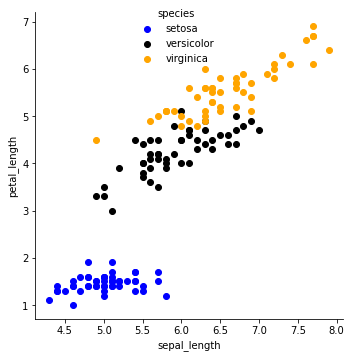

In [6]:
#Visualicemos un poquillo, hagamos lo mismo que en clase, un PLOT por tipo de especie
sns.FacetGrid(iris, hue ="species",
              height = 5, palette=['blue','black','orange']).map(plt.scatter,
                              'sepal_length',
                              'petal_length').add_legend(loc ="upper center")
#En la gráfica podemos ver que hay intersecciones donde algunas especies tienen sépalos de igual tamaño
#Podemos asumir que las diferencias se deben a que son de diferentes especies, pero...
#¿Qué otro atributo nos puede ayudar a diferenciar? -> Los pétalos

# Divide and Conquer ⚔

In [7]:
#Primero dividamos por especies
dfsetosa = iris[(iris['species'] == "setosa")]
dfversicolor = iris[(iris['species'] == "versicolor")]
dfvirginica = iris[(iris['species'] == "virginica")]

# Quiero ver si los sets pueden asumirse normales ❓

In [8]:
#Importamos el test Shapiro para probar normalidad para cada set
#Importante notar que si pvalue > 0.05 entonces se asume distribución normal
#¿De dónde me saco a Shapiro? - de aquí: https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test
from scipy.stats import shapiro

In [9]:
#Pvalue es 0.4595 > 0.05 -> No hay suficiente evidencia para rechazar H nula, ergo, la distribución es normal
shapiro(dfsetosa['sepal_length'])

ShapiroResult(statistic=0.9776989221572876, pvalue=0.4595281183719635)

In [10]:
#Pvalue es 0.4647 > 0.05 -> No hay suficiente evidencia para rechazar H nula, ergo, la distribución es normal
shapiro(dfversicolor['sepal_length'])

ShapiroResult(statistic=0.9778355956077576, pvalue=0.46473264694213867)

In [11]:
#Pvalue es 0.2583 > 0.05 -> No hay suficiente evidencia para rechazar H nula, ergo, la distribución es normal
shapiro(dfvirginica['sepal_length'])

ShapiroResult(statistic=0.9711798429489136, pvalue=0.25832483172416687)

# Ok, asumimos normalidad, ¿Y ahora qué? ¿Conclusiones? ⛪

In [12]:
#¿De dónde me saco la prueba? Two sample t-test https://www.statology.org/two-sample-t-test/
#pongo equal var = True para asumir que son iguales
#Si la prueba sale con pvalue > 0.05 entonces las medias son iguales de lo contrario -ño-
import scipy.stats as stats

In [13]:
stats.ttest_ind(dfsetosa['sepal_length'],dfversicolor['sepal_length'], equal_var=True)

Ttest_indResult(statistic=-10.52098626754911, pvalue=8.985235037487079e-18)

In [14]:
stats.ttest_ind(dfvirginica['sepal_length'],dfversicolor['sepal_length'], equal_var=True)

Ttest_indResult(statistic=5.629165259719801, pvalue=1.7248563024547942e-07)

In [15]:
stats.ttest_ind(dfsetosa['sepal_length'],dfvirginica['sepal_length'], equal_var=True)

Ttest_indResult(statistic=-15.386195820079404, pvalue=6.892546060674059e-28)

# Ahora a graficar!!! 📊

In [16]:
#Importamos unos pequeños artilugios para plotear los datos y su fit con la normal
from scipy.stats import norm

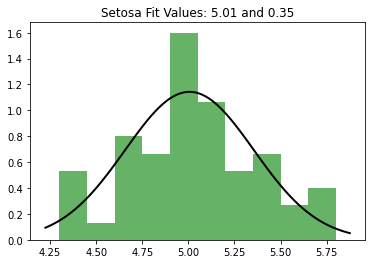

In [17]:
# Plot the histogram.
mu, std = norm.fit(dfsetosa['sepal_length']) 
plt.hist(dfsetosa['sepal_length'], bins=10, density=True, alpha=0.6, color='green')
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Setosa Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)
plt.show()

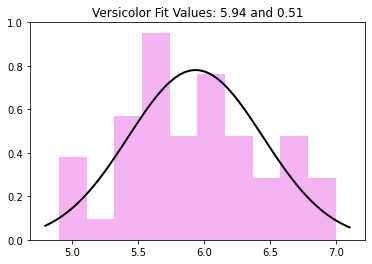

In [18]:
# Plot the histogram.
mu, std = norm.fit(dfversicolor['sepal_length']) 
plt.hist(dfversicolor['sepal_length'], bins=10, density=True, alpha=0.6, color='violet')
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Versicolor Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)
plt.show()

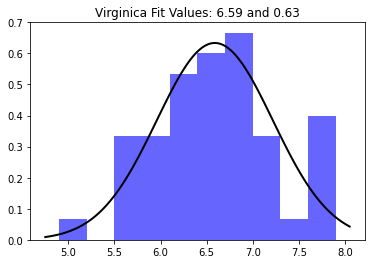

In [20]:
# Plot the histogram.
mu, std = norm.fit(dfvirginica['sepal_length']) 
plt.hist(dfvirginica['sepal_length'], bins=10, density=True, alpha=0.6, color='blue')
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Virginica Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)
plt.show()